In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects

from scipy import stats

In [2]:
def get_t_score_from_p_value(p_val_ref,df):
    t_score = 1
    p_val = 2*(1 - stats.t.cdf(t_score,df=df))
    err = 0.0000001
    factor = 10

    while abs(p_val - p_val_ref) > err:
        t_score = t_score + (p_val - p_val_ref)*factor
        p_val = 2*(1 - stats.t.cdf(t_score,df=df))
        
    return t_score

# MQ2008

In [3]:
folds = ["fold1","fold2","fold3","fold4","fold5"]

measures_names = ["P@1","P@2","P@3","P@4","P@5","P@6","P@7","P@8","P@9","P@10","P_Mean",
                  "NDCG@1","NDCG@2","NDCG@3","NDCG@4","NDCG@5","NDCG@6","NDCG@7","NDCG@8","NDCG@9","NDCG@10",
                  "NDCG_Mean"]

datasets = ["train","vali","test"]

In [4]:
dataset_path = "../../MQ2008/min.txt"
with open(dataset_path) as f:
   n = sum(1 for _ in f)

n_samples_datasets = [int(0.6*n),int(0.2*n),int(0.2*n)]

### NDCG measures for the top models of RankLib implementation

In [5]:
ranklib_path = "../../MQ2008/results_summary/Results_RankLib_global_vali.csv"
ranklib_df = pd.read_csv(ranklib_path)

ranklib_df = ranklib_df.sort_values(['NDCG_Mean'],ascending=False)
ranklib_top_model_id = ranklib_df.index[0]

In [6]:
#TOP 5 MODELS OF THE RANKLIB IMPLEMENTATION
ranklib_df.head(5)

,epochs,learning_rate,Opti_method,P@1,P@2,P@3,P@4,P@5,P@6,P@7,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
15,1000,0.00001,NDCG@5,0.41752,0.39138,0.36706,0.35022,0.33266,0.31378,0.29300,...,0.40856,0.43220,0.45352,0.47004,0.47670,0.44342,0.21112,0.21592,0.385060,0.008635
21,1500,0.00100,NDCG@10,0.41496,0.38798,0.36564,0.34608,0.33120,0.31198,0.29214,...,0.40744,0.42988,0.45152,0.46752,0.47510,0.44168,0.21086,0.21542,0.383548,0.008511
28,1500,0.00001,P@10,0.41326,0.38902,0.36366,0.34950,0.33342,0.31340,0.29196,...,0.40490,0.43024,0.45228,0.46796,0.47476,0.44172,0.21212,0.21614,0.383384,0.008456
37,2000,0.00001,P@5,0.41494,0.38730,0.36492,0.35128,0.33410,0.31436,0.29210,...,0.40584,0.43172,0.45356,0.46782,0.47428,0.44070,0.20956,0.21410,0.383244,0.008618
29,1500,0.00001,ERR@10,0.41070,0.38904,0.36506,0.35010,0.33146,0.31292,0.29232,...,0.40700,0.43150,0.45222,0.46746,0.47524,0.44196,0.21008,0.21522,0.383020,0.008613


In [7]:
ranklib_df.iloc[0]["P_Mean"]

0.324048

In [8]:
columns = ["Fold" if x == 0 else ranklib_df.columns[x-1] for x in range(len(ranklib_df.columns)+1)]
best_df = pd.DataFrame(columns = columns)
index = 0
for fold in ["fold1","fold2","fold3","fold4","fold5","global"]:
    my_path = "../../MQ2008/results_summary/Results_RankLib_"+fold+"_test.csv"
    temp_df = pd.read_csv(my_path)
    best_df.loc[index,0:1] = fold
    best_df.loc[index,1:] = (temp_df.loc[ranklib_top_model_id])
    index += 1

In [9]:
best_df

,Fold,epochs,learning_rate,Opti_method,P@1,P@2,P@3,P@4,P@5,P@6,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
0,fold1,1000,1e-05,NDCG@5,0.391,0.3686,0.3611,0.3606,0.3436,0.3109,...,0.3843,0.4168,0.4408,0.4514,0.4604,0.4078,0.199,0.204,0.36151,0.00841872
1,fold2,1000,1e-05,NDCG@5,0.4013,0.3408,0.31,0.3041,0.2904,0.2781,...,0.3522,0.3774,0.3952,0.4134,0.4167,0.4015,0.1449,0.1488,0.33364,0.00939864
2,fold3,1000,1e-05,NDCG@5,0.414,0.3758,0.3376,0.3248,0.307,0.3015,...,0.3914,0.4183,0.4355,0.4608,0.4627,0.4459,0.2362,0.2454,0.38456,0.00610522
3,fold4,1000,1e-05,NDCG@5,0.4713,0.4459,0.4374,0.4108,0.3847,0.3705,...,0.4613,0.4899,0.5034,0.5191,0.5253,0.4744,0.2782,0.2841,0.43425,0.00746566
4,fold5,1000,1e-05,NDCG@5,0.4204,0.3885,0.3609,0.3471,0.3376,0.3153,...,0.4116,0.4384,0.476,0.4895,0.4954,0.4645,0.1969,0.2021,0.39228,0.011016
5,global,1000,1e-05,NDCG@5,0.4196,0.38392,0.3614,0.34948,0.33266,0.31526,...,0.40016,0.42816,0.45018,0.46684,0.4721,0.43882,0.21104,0.21688,0.381248,0.00828659


### NDCG measures for the top models of LTR4L implementation

In [10]:
ltr4l_path = "../../MQ2008/results_summary/Results_ltr4l_global_vali.csv"
ltr4l_df = pd.read_csv(ltr4l_path)

ltr4l_df = ltr4l_df.sort_values(['NDCG_Mean'],ascending=False)
ltr4l_top_model_id = ltr4l_df.index[0]

In [11]:
#TOP 5 MODELS OF THE LTR4L IMPLEMENTATION
ltr4l_df.head(5)

,epochs,learning_rate,momentum,output function,hidden function,nb hidden layers,nb neurons,P@1,P@2,P@3,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
2,100,0.001,0.10,Identity,NaN,NaN,NaN,0.45874,0.41792,0.39240,...,0.43742,0.45888,0.47838,0.49170,0.49754,0.46064,0.22522,0.22950,0.407946,0.009188
0,100,0.001,0.01,Identity,NaN,NaN,NaN,0.45872,0.41772,0.39198,...,0.43720,0.45884,0.47826,0.49160,0.49744,0.46050,0.22498,0.22932,0.407856,0.009194
4,100,0.001,0.30,Identity,NaN,NaN,NaN,0.45832,0.41792,0.39212,...,0.43702,0.45876,0.47812,0.49146,0.49742,0.46056,0.22510,0.22936,0.407744,0.009185
14,500,0.001,0.10,Identity,NaN,NaN,NaN,0.45620,0.41772,0.39198,...,0.43674,0.45876,0.47796,0.49142,0.49752,0.46062,0.22536,0.22972,0.407578,0.009167
12,500,0.001,0.01,Identity,NaN,NaN,NaN,0.45620,0.41772,0.39198,...,0.43674,0.45876,0.47796,0.49142,0.49752,0.46062,0.22536,0.22970,0.407576,0.009167


In [12]:
ltr4l_df.iloc[0]["P_Mean"]

0.341772

In [13]:
columns = ["Fold" if x == 0 else ltr4l_df.columns[x-1] for x in range(len(ltr4l_df.columns)+1)]
best_df = pd.DataFrame(columns = columns)
index = 0
for fold in ["fold1","fold2","fold3","fold4","fold5","global"]:
    my_path = "../../MQ2008/results_summary/Results_ltr4l_"+fold+"_test.csv"
    temp_df = pd.read_csv(my_path)
    best_df.loc[index,0:1] = fold
    best_df.loc[index,1:] = (temp_df.loc[ltr4l_top_model_id])
    index += 1

In [14]:
best_df

,Fold,epochs,learning_rate,momentum,output function,hidden function,nb hidden layers,nb neurons,P@1,P@2,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
0,fold1,100,0.001,0.1,Identity,NaN,NaN,NaN,0.4359,0.4006,...,0.4135,0.438,0.4584,0.4689,0.4818,0.4309,0.2141,0.2157,0.38847,0.00853585
1,fold2,100,0.001,0.1,Identity,NaN,NaN,NaN,0.3885,0.3662,...,0.3812,0.4038,0.4222,0.4347,0.4401,0.4201,0.1684,0.1737,0.35056,0.00951286
2,fold3,100,0.001,0.1,Identity,NaN,NaN,NaN,0.4204,0.379,...,0.3954,0.4298,0.4503,0.4671,0.4689,0.4519,0.2421,0.2509,0.39059,0.00631178
3,fold4,100,0.001,0.1,Identity,NaN,NaN,NaN,0.4904,0.4777,...,0.4975,0.5182,0.5323,0.5392,0.5462,0.4963,0.2855,0.2904,0.45649,0.0088107
4,fold5,100,0.001,0.1,Identity,NaN,NaN,NaN,0.4713,0.4236,...,0.466,0.4801,0.5073,0.5244,0.5286,0.4943,0.2106,0.2179,0.42451,0.0126938
5,global,100,0.001,0.1,Identity,NaN,NaN,NaN,0.4413,0.40942,...,0.43072,0.45398,0.4741,0.48686,0.49312,0.4587,0.22414,0.22972,0.402124,0.00899574


### Comparison NDCG measures between top model of RankLib ListNet and LTR4L

In [15]:
ranklib_mean = [[] for x in range(len(datasets))]
ranklib_var = [[] for x in range(len(datasets))]

ltr4l_mean = [[] for x in range(len(datasets))]
ltr4l_var = [[] for x in range(len(datasets))]

for idx_dataset in range(len(datasets)):
    ranklib_list_NDCG = [[] for x in range(len(measures_names))]
    ltr4l_list_NDCG = [[] for x in range(len(measures_names))]
    
    for idx_fold in range(len(folds)):
        
        ranklib_path = "../../MQ2008/results_summary/Results_RankLib_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"
        ltr4l_path = "../../MQ2008/results_summary/Results_ltr4l_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"

        ranklib_df = pd.read_csv(ranklib_path)
        ltr4l_df = pd.read_csv(ltr4l_path)
        
        for idx_metric in range(len(measures_names)):
            ranklib_list_NDCG[idx_metric].append(ranklib_df.iloc[ranklib_top_model_id][measures_names[idx_metric]])
            ltr4l_list_NDCG[idx_metric].append(ltr4l_df.iloc[ltr4l_top_model_id][measures_names[idx_metric]])
            
    ranklib_mean[idx_dataset] = np.array(ranklib_list_NDCG).mean(axis=1)
    ranklib_var[idx_dataset] = np.array(ranklib_list_NDCG).var(axis=1)
    
    ltr4l_mean[idx_dataset] = np.array(ltr4l_list_NDCG).mean(axis=1)
    ltr4l_var[idx_dataset] = np.array(ltr4l_list_NDCG).var(axis=1)

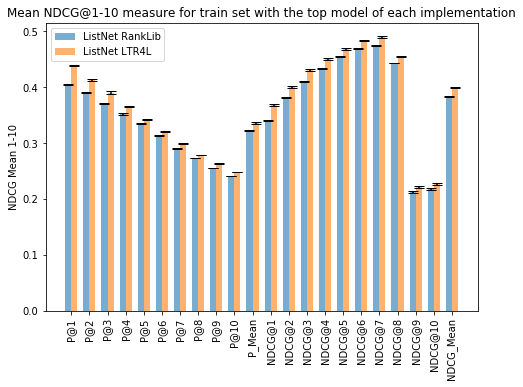

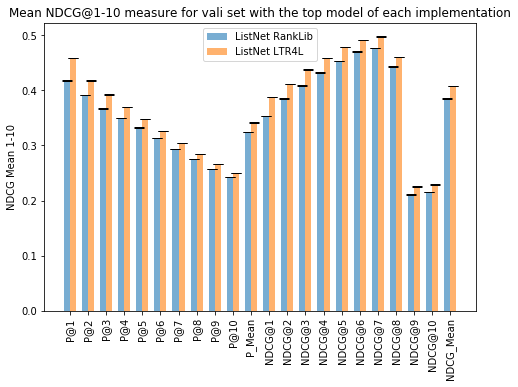

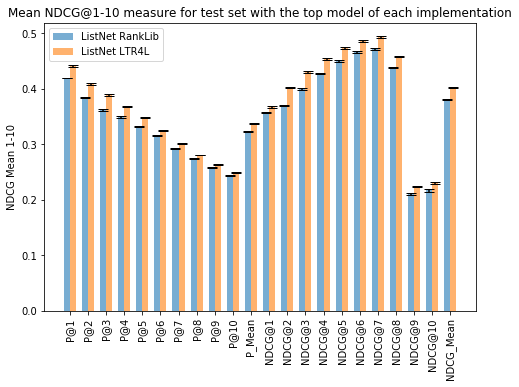

In [16]:
indices = range(len(measures_names))
width = np.min(np.diff(indices))/3.

for idx_dataset in range(len(datasets)):
    ax = plt.figure().add_axes([0,0,1,1])
    plt.xticks(rotation=90)
    ax.bar(indices-width/2, ranklib_mean[idx_dataset],width, yerr = ranklib_var[idx_dataset],\
           align='center', alpha=0.6, ecolor='black', capsize=5, label = "ListNet RankLib")
    ax.bar(indices+width/2, ltr4l_mean[idx_dataset],width, yerr = ltr4l_var[idx_dataset],\
           align='center', alpha=0.6, ecolor='black', capsize=5, label = "ListNet LTR4L")
    ax.set_title("Mean NDCG@1-10 measure for "+datasets[idx_dataset]+" set with the top model of each implementation")
    ax.set_xticks(indices)
    ax.axes.set_xticklabels(measures_names)
    ax.set_ylabel("NDCG Mean 1-10")
    ax.legend(loc='best')

### Comparing NDCG of the top model of each library with Wilcoxon's signed-rank test

We will now compare the results by the two bests models of our libraries with the Wilcoxon's signed-rank test
- We take the best model of each library
- We study how they perform on each folder
- We will compare their NDCG values and use them for the Wilcoxon's signed-rank test

In [17]:
measures_names = ["P@1","P@2","P@3","P@4","P@5","P@6","P@7","P@8","P@9","P@10","P_Mean",
                  "NDCG@1","NDCG@2","NDCG@3","NDCG@4","NDCG@5","NDCG@6","NDCG@7","NDCG@8","NDCG@9","NDCG@10",
                  "NDCG_Mean"]

w_score = [[] for x in range(len(datasets))]
p_value = [[] for x in range(len(datasets))]

sig_lvl = 0.05

In [18]:
n = len(folds)

for idx_dataset in range(len(datasets)):
    diff = [[] for x in range(len(measures_names))]
    
    for idx_fold in range(len(folds)):
        
        ranklib_path = "../../MQ2008/results_summary/Results_RankLib_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"
        ltr4l_path = "../../MQ2008/results_summary/Results_ltr4l_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"

        ranklib_df = pd.read_csv(ranklib_path)
        ltr4l_df = pd.read_csv(ltr4l_path)
        
        for idx_metric in range(len(measures_names)):
            ranklib_NDCG = ranklib_df.iloc[ranklib_top_model_id][measures_names[idx_metric]]
            ltr4l_NDCG = ltr4l_df.iloc[ltr4l_top_model_id][measures_names[idx_metric]]
            diff[idx_metric].append(ranklib_NDCG - ltr4l_NDCG)
            
    for idx_metric in range(len(measures_names)):        
        w,p= stats.wilcoxon(diff[idx_metric])
        w_score[idx_dataset].append(w)
        p_value[idx_dataset].append(p)

/usr/local/lib/python3.5/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


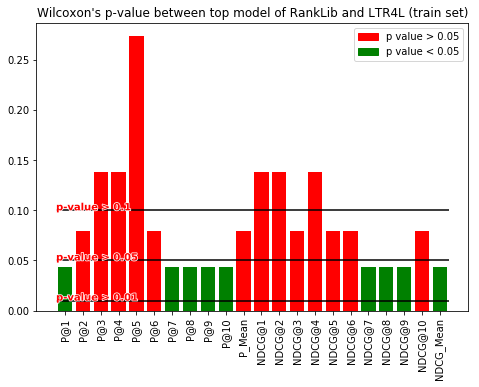

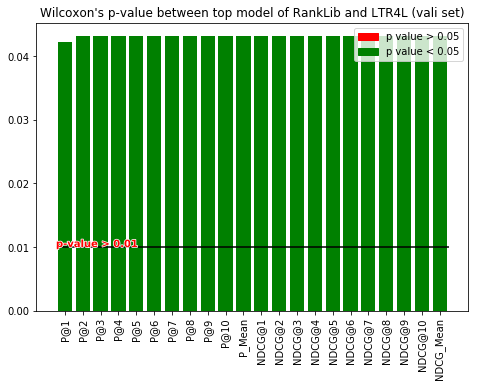

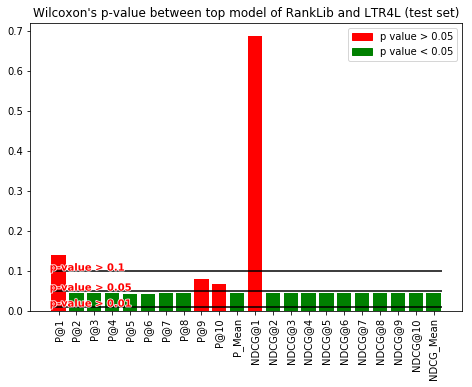

In [19]:
red_patch = mpatches.Patch(color='red', label='p value > '+str(sig_lvl))
green_patch = mpatches.Patch(color='green', label='p value < '+str(sig_lvl))
for idx_dataset in range(len(datasets)):
    colors = []
    for idx_metric in range(len(measures_names)):
        if p_value[idx_dataset][idx_metric] < sig_lvl:
            colors.append("green")
        else:
            colors.append("red")

    ax = plt.figure().add_axes([0,0,1,1])
    plt.xticks(rotation=90)
    ax.bar(measures_names,p_value[idx_dataset],color=colors)
    ax.set_title("Wilcoxon's p-value between top model of RankLib and LTR4L ("+datasets[idx_dataset]+" set)")
    ax.legend(handles=[red_patch,green_patch])
    if any(p > 0.1 for p in p_value[idx_dataset]):
        ax.hlines(0.1,-0.5,len(measures_names)-0.5, label="p_value > 0.1")
        txt = ax.text(-0.5, 0.1, s="p-value > 0.1", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])
    if any(p > 0.05 for p in p_value[idx_dataset]):
        ax.hlines(0.05,-0.5,len(measures_names)-0.5, label="p_value > 0.05")
        txt=ax.text(-0.5, 0.05, s="p-value > 0.05", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])
    if any(p > 0.01 for p in p_value[idx_dataset]):
        ax.hlines(0.01,-0.5,len(measures_names)-0.5, label="p_value > 0.01")
        txt=ax.text(-0.5, 0.01, s="p-value > 0.01", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])

In [20]:
w_score_df = pd.DataFrame(w_score, columns = measures_names, index=datasets)
w_score_df.style.set_caption("W score")

,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,P@10,P_Mean,NDCG@1,NDCG@2,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean
train,0,1,2,2,2,1,0,0,0,0,1,2,2,1,2,1,1,0,0,0,1,0
vali,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
test,2,0,0,0,0,0,0,0,1,0,0,6,0,0,0,0,0,0,0,0,0,0


In [22]:
p_value_df = pd.DataFrame(p_value, columns = measures_names, index=datasets)
p_value_df.style.set_caption("P-value score")

,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,P@10,P_Mean,NDCG@1,NDCG@2,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean
train,0.0431144,0.0796158,0.138011,0.138011,0.273322,0.0796158,0.0431144,0.0431144,0.0431144,0.0431144,0.0796158,0.138011,0.138011,0.0796158,0.138011,0.0796158,0.0796158,0.0431144,0.0431144,0.0431144,0.0796158,0.0431144
vali,0.0421682,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144
test,0.138011,0.0431144,0.0431144,0.0431144,0.0421682,0.0421682,0.0431144,0.0431144,0.0796158,0.0678892,0.0431144,0.68583,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144


# MQ2007

In [23]:
folds = ["fold1","fold2","fold3","fold4","fold5"]

measures_names = ["P@1","P@2","P@3","P@4","P@5","P@6","P@7","P@8","P@9","P@10","P_Mean",
                  "NDCG@1","NDCG@2","NDCG@3","NDCG@4","NDCG@5","NDCG@6","NDCG@7","NDCG@8","NDCG@9","NDCG@10",
                  "NDCG_Mean"]

datasets = ["train","vali","test"]

In [24]:
dataset_path = "../../MQ2007/min.txt"
with open(dataset_path) as f:
   n = sum(1 for _ in f)

n_samples_datasets = [int(0.6*n),int(0.2*n),int(0.2*n)]

### NDCG measures for the top models of RankLib implementation

In [25]:
ranklib_path = "../../MQ2007/results_summary/Results_RankLib_global_vali.csv"
ranklib_df = pd.read_csv(ranklib_path)

ranklib_df = ranklib_df.sort_values(['NDCG_Mean'],ascending=False)
ranklib_top_model_id = ranklib_df.index[0]

In [26]:
ranklib_df.head(5)

,epochs,learning_rate,Opti method,P@1,P@2,P@3,P@4,P@5,P@6,P@7,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
23,1500,0.001,P@10,0.45134,0.43124,0.41496,0.40120,0.39234,0.38526,0.37660,...,0.39238,0.39460,0.39812,0.40378,0.40772,0.41318,0.41816,0.42424,0.402896,0.000145
31,2000,0.001,NDCG@10,0.45312,0.43146,0.41434,0.40190,0.39294,0.38588,0.37826,...,0.39078,0.39406,0.39794,0.40318,0.40762,0.41292,0.41848,0.42364,0.402724,0.000141
1,500,0.001,NDCG@10,0.44684,0.43352,0.41478,0.40294,0.39244,0.38544,0.37680,...,0.39194,0.39518,0.39798,0.40342,0.40720,0.41236,0.41786,0.42304,0.402362,0.000146
3,500,0.001,P@10,0.44858,0.42986,0.41562,0.40236,0.39314,0.38722,0.37918,...,0.39148,0.39386,0.39748,0.40390,0.40822,0.41304,0.41878,0.42406,0.402356,0.000162
22,1500,0.001,P@5,0.44862,0.43106,0.41634,0.40274,0.39256,0.38542,0.37778,...,0.39202,0.39468,0.39746,0.40340,0.40754,0.41294,0.41792,0.42348,0.402334,0.000151


In [27]:
ranklib_df.iloc[0]["P_Mean"]

0.394984

In [28]:
columns = ["Fold" if x == 0 else ranklib_df.columns[x-1] for x in range(len(ranklib_df.columns)+1)]
best_df = pd.DataFrame(columns = columns)
index = 0
for fold in ["fold1","fold2","fold3","fold4","fold5","global"]:
    my_path = "../../MQ2007/results_summary/Results_RankLib_"+fold+"_test.csv"
    temp_df = pd.read_csv(my_path)
    best_df.loc[index,0:1] = fold
    best_df.loc[index,1:] = (temp_df.loc[ranklib_top_model_id])
    index += 1

In [29]:
best_df

,Fold,epochs,learning_rate,Opti method,P@1,P@2,P@3,P@4,P@5,P@6,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
0,fold1,1500,0.001,P@10,0.4524,0.4464,0.4276,0.4167,0.4161,0.4043,...,0.4125,0.4174,0.4262,0.429,0.4363,0.441,0.4431,0.4471,0.42562,0.000266222
1,fold2,1500,0.001,P@10,0.4454,0.4218,0.409,0.4041,0.4012,0.3968,...,0.3652,0.3725,0.3796,0.3895,0.3924,0.3968,0.4036,0.409,0.38434,0.0002385
2,fold3,1500,0.001,P@10,0.4543,0.4572,0.4277,0.4078,0.3894,0.382,...,0.4137,0.4149,0.4138,0.4213,0.4216,0.4221,0.4278,0.4328,0.41807,9.17081e-05
3,fold4,1500,0.001,P@10,0.4248,0.3864,0.3786,0.3702,0.3634,0.3584,...,0.3527,0.3574,0.3632,0.3686,0.376,0.3823,0.3874,0.3956,0.36877,0.00023305
4,fold5,1500,0.001,P@10,0.4808,0.4484,0.4366,0.4115,0.3935,0.3835,...,0.4185,0.4152,0.4118,0.4159,0.4224,0.4289,0.4339,0.4399,0.42166,8.21224e-05
5,global,1500,0.001,P@10,0.45154,0.43204,0.4159,0.40206,0.39272,0.385,...,0.39252,0.39548,0.39892,0.40486,0.40974,0.41422,0.41916,0.42488,0.403692,0.000151237


### NDCG measures for the top models of LTR4L implementation

In [32]:
ltr4l_path = "../../MQ2007/results_summary/Results_ltr4l_global_vali.csv"
ltr4l_df = pd.read_csv(ltr4l_path)

ltr4l_df = ltr4l_df.sort_values(['NDCG_Mean'],ascending=False)
ltr4l_top_model_id = ltr4l_df.index[0]

In [33]:
ltr4l_df.head()

,epochs,learning_rate,momentum,output function,hidden function,nb hidden layers,nb neurons,P@1,P@2,P@3,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
16,500,0.001,0.30,Identity,NaN,NaN,NaN,0.47638,0.45302,0.44010,...,0.41444,0.41854,0.42342,0.42778,0.43196,0.43704,0.44232,0.44710,0.425894,0.000170
12,500,0.001,0.01,Identity,NaN,NaN,NaN,0.47638,0.45302,0.44004,...,0.41440,0.41852,0.42342,0.42774,0.43196,0.43702,0.44232,0.44710,0.425882,0.000170
4,100,0.001,0.30,Identity,NaN,NaN,NaN,0.47578,0.45292,0.44000,...,0.41440,0.41842,0.42360,0.42788,0.43204,0.43700,0.44212,0.44696,0.425882,0.000169
14,500,0.001,0.10,Identity,NaN,NaN,NaN,0.47638,0.45302,0.44004,...,0.41440,0.41852,0.42342,0.42774,0.43196,0.43702,0.44232,0.44710,0.425882,0.000170
0,100,0.001,0.01,Identity,NaN,NaN,NaN,0.47618,0.45282,0.43990,...,0.41432,0.41842,0.42354,0.42790,0.43196,0.43694,0.44206,0.44692,0.425860,0.000168


In [34]:
ltr4l_df.iloc[0]["P_Mean"]

0.419642

In [35]:
columns = ["Fold" if x == 0 else ltr4l_df.columns[x-1] for x in range(len(ltr4l_df.columns)+1)]
best_df = pd.DataFrame(columns = columns)
index = 0
for fold in ["fold1","fold2","fold3","fold4","fold5","global"]:
    my_path = "../../MQ2007/results_summary/Results_ltr4l_"+fold+"_test.csv"
    temp_df = pd.read_csv(my_path)
    best_df.loc[index,0:1] = fold
    best_df.loc[index,1:] = (temp_df.loc[ltr4l_top_model_id])
    index += 1

In [36]:
best_df

,Fold,epochs,learning_rate,momentum,output function,hidden function,nb hidden layers,nb neurons,P@1,P@2,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
0,fold1,500,0.001,0.3,Identity,NaN,NaN,NaN,0.497,0.4807,...,0.447,0.4478,0.4516,0.4547,0.4605,0.4649,0.4704,0.4754,0.45597,0.000116472
1,fold2,500,0.001,0.3,Identity,NaN,NaN,NaN,0.469,0.4425,...,0.3881,0.3933,0.3978,0.4028,0.4092,0.414,0.4184,0.4253,0.40259,0.000165591
2,fold3,500,0.001,0.3,Identity,NaN,NaN,NaN,0.4808,0.4558,...,0.4167,0.4179,0.4225,0.4278,0.4275,0.4342,0.4403,0.4445,0.42731,8.21509e-05
3,fold4,500,0.001,0.3,Identity,NaN,NaN,NaN,0.4513,0.4263,...,0.3697,0.3743,0.3789,0.3846,0.3904,0.4016,0.4102,0.4179,0.38665,0.000286763
4,fold5,500,0.001,0.3,Identity,NaN,NaN,NaN,0.4631,0.4558,...,0.4133,0.4175,0.4165,0.4234,0.4315,0.4366,0.4433,0.4472,0.42425,0.000202591
5,global,500,0.001,0.3,Identity,NaN,NaN,NaN,0.47224,0.45222,...,0.40696,0.41016,0.41346,0.41866,0.42382,0.43026,0.43652,0.44206,0.419354,0.00015922


### Comparison NDCG measures between top model of Ranklib ListNet and LTR4L

In [37]:
ranklib_mean = [[] for x in range(len(datasets))]
ranklib_var = [[] for x in range(len(datasets))]

ltr4l_mean = [[] for x in range(len(datasets))]
ltr4l_var = [[] for x in range(len(datasets))]

for idx_dataset in range(len(datasets)):
    ranklib_list_NDCG = [[] for x in range(len(measures_names))]
    ltr4l_list_NDCG = [[] for x in range(len(measures_names))]
    
    for idx_fold in range(len(folds)):
        
        ranklib_path = "../../MQ2007/results_summary/Results_RankLib_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"
        ltr4l_path = "../../MQ2007/results_summary/Results_ltr4l_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"

        ranklib_df = pd.read_csv(ranklib_path)
        ltr4l_df = pd.read_csv(ltr4l_path)
        
        for idx_metric in range(len(measures_names)):
            ranklib_list_NDCG[idx_metric].append(ranklib_df.iloc[ranklib_top_model_id][measures_names[idx_metric]])
            ltr4l_list_NDCG[idx_metric].append(ltr4l_df.iloc[ltr4l_top_model_id][measures_names[idx_metric]])
            
    ranklib_mean[idx_dataset] = np.array(ranklib_list_NDCG).mean(axis=1)
    ranklib_var[idx_dataset] = np.array(ranklib_list_NDCG).var(axis=1)
    
    ltr4l_mean[idx_dataset] = np.array(ltr4l_list_NDCG).mean(axis=1)
    ltr4l_var[idx_dataset] = np.array(ltr4l_list_NDCG).var(axis=1)

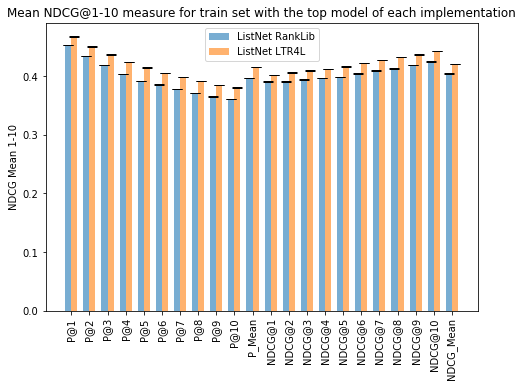

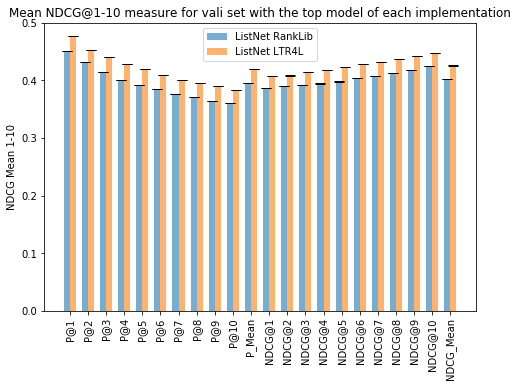

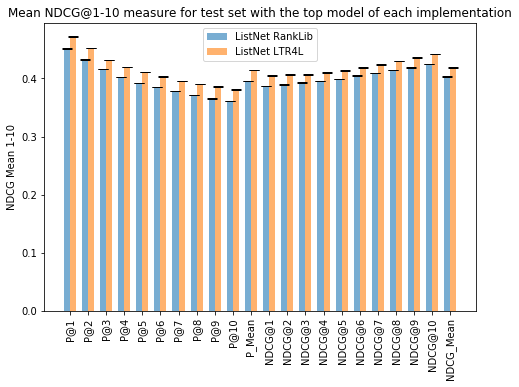

In [38]:
indices = range(len(measures_names))
width = np.min(np.diff(indices))/3.

for idx_dataset in range(len(datasets)):
    ax = plt.figure().add_axes([0,0,1,1])
    plt.xticks(rotation=90)
    ax.bar(indices-width/2, ranklib_mean[idx_dataset],width, yerr = ranklib_var[idx_dataset],\
           align='center', alpha=0.6, ecolor='black', capsize=5, label = "ListNet RankLib")
    ax.bar(indices+width/2, ltr4l_mean[idx_dataset],width, yerr = ltr4l_var[idx_dataset],\
           align='center', alpha=0.6, ecolor='black', capsize=5, label = "ListNet LTR4L")
    ax.set_title("Mean NDCG@1-10 measure for "+datasets[idx_dataset]+" set with the top model of each implementation")
    ax.set_xticks(indices)
    ax.axes.set_xticklabels(measures_names)
    ax.set_ylabel("NDCG Mean 1-10")
    ax.legend(loc='best')

### Comparing NDCG of the top model of each library with Wilcoxon's signed-rank test

We will now compare the results by the two bests models of our libraries with the Wilcoxon's signed-rank test
- We take the best model of each library
- We study how they perform on each folder
- We will compare their NDCG values and use them for the Wilcoxon's signed-rank test

In [39]:
measures_names = ["P@1","P@2","P@3","P@4","P@5","P@6","P@7","P@8","P@9","P@10","P_Mean",
                  "NDCG@1","NDCG@2","NDCG@3","NDCG@4","NDCG@5","NDCG@6","NDCG@7","NDCG@8","NDCG@9","NDCG@10",
                  "NDCG_Mean"]

w_score = [[] for x in range(len(datasets))]
p_value = [[] for x in range(len(datasets))]

sig_lvl = 0.05

In [40]:
n = len(folds)

for idx_dataset in range(len(datasets)):
    diff = [[] for x in range(len(measures_names))]
    ranklib_NDCG = [[] for x in range(len(measures_names))]
    ltr4l_NDCG = [[] for x in range(len(measures_names))]
    
    for idx_fold in range(len(folds)):
        
        ranklib_path = "../../MQ2007/results_summary/Results_RankLib_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"
        ltr4l_path = "../../MQ2007/results_summary/Results_ltr4l_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"

        ranklib_df = pd.read_csv(ranklib_path)
        ltr4l_df = pd.read_csv(ltr4l_path)
        
        for idx_metric in range(len(measures_names)):
            ranklib_NDCG = ranklib_df.iloc[ranklib_top_model_id][measures_names[idx_metric]]
            ltr4l_NDCG = ltr4l_df.iloc[ltr4l_top_model_id][measures_names[idx_metric]]
            diff[idx_metric].append(ranklib_NDCG - ltr4l_NDCG)
            
    for idx_metric in range(len(measures_names)):        
        w,p= stats.wilcoxon(diff[idx_metric])
        w_score[idx_dataset].append(w)
        p_value[idx_dataset].append(p)

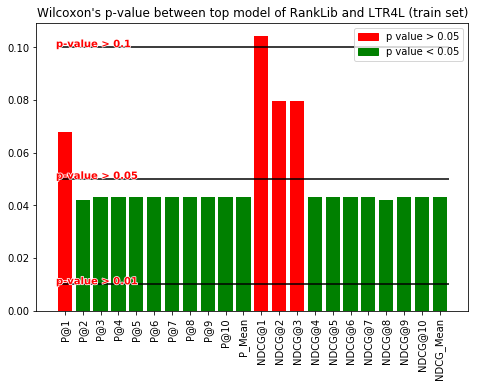

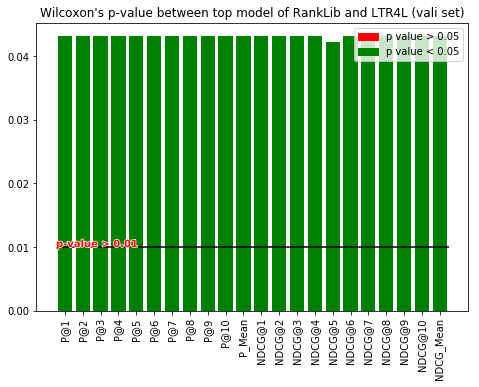

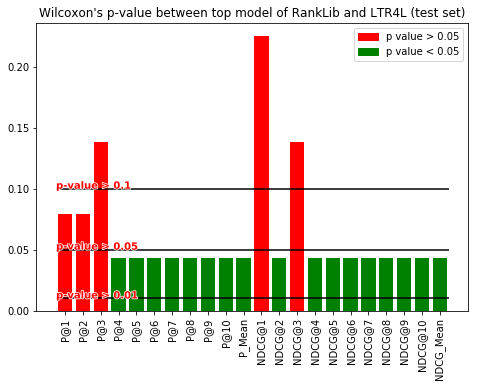

In [41]:
red_patch = mpatches.Patch(color='red', label='p value > '+str(sig_lvl))
green_patch = mpatches.Patch(color='green', label='p value < '+str(sig_lvl))
for idx_dataset in range(len(datasets)):
    colors = []
    for idx_metric in range(len(measures_names)):
        if p_value[idx_dataset][idx_metric] < sig_lvl:
            colors.append("green")
        else:
            colors.append("red")

    ax = plt.figure().add_axes([0,0,1,1])
    plt.xticks(rotation=90)
    ax.bar(measures_names,p_value[idx_dataset],color=colors)
    ax.set_title("Wilcoxon's p-value between top model of RankLib and LTR4L ("+datasets[idx_dataset]+" set)")
    ax.legend(handles=[red_patch,green_patch])
    if any(p > 0.1 for p in p_value[idx_dataset]):
        ax.hlines(0.1,-0.5,len(measures_names)-0.5, label="p_value > 0.1")
        txt = ax.text(-0.5, 0.1, s="p-value > 0.1", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])
    if any(p > 0.05 for p in p_value[idx_dataset]):
        ax.hlines(0.05,-0.5,len(measures_names)-0.5, label="p_value > 0.05")
        txt=ax.text(-0.5, 0.05, s="p-value > 0.05", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])
    if any(p > 0.01 for p in p_value[idx_dataset]):
        ax.hlines(0.01,-0.5,len(measures_names)-0.5, label="p_value > 0.01")
        txt=ax.text(-0.5, 0.01, s="p-value > 0.01", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])

In [42]:
w_score_df = pd.DataFrame(w_score, columns = measures_names, index=datasets)
w_score_df.style.set_caption("W score")

,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,P@10,P_Mean,NDCG@1,NDCG@2,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean
train,0,0,0,0,0,0,0,0,0,0,0,1.5,1,1,0,0,0,0,0,0,0,0
vali,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
test,1,1,2,0,0,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,0


In [43]:
p_value_df = pd.DataFrame(p_value, columns = measures_names, index=datasets)
p_value_df.style.set_caption("P-value score")

,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,P@10,P_Mean,NDCG@1,NDCG@2,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean
train,0.0678892,0.0421682,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.104059,0.0796158,0.0796158,0.0431144,0.0431144,0.0431144,0.0431144,0.0421682,0.0431144,0.0431144,0.0431144
vali,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0421682,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144
test,0.0796158,0.0796158,0.138011,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.224916,0.0431144,0.138011,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144
